In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read data
#Documents/Institute of Data/IOD_Lab_Work_For_Github/IOD Projects/MP2New/HR_comma_sep.csv
HR = '../../IOD Projects/MP2New/HR_comma_sep.csv'
hr = pd.read_csv(HR)

In [4]:
# Checking data
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Checking info of columns, data types, number of observations, null values
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# What does last evaluation column do?
hr['last_evaluation'].unique()

array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [7]:
# Some statistical magic
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


## WARNING!! Random messy EDA

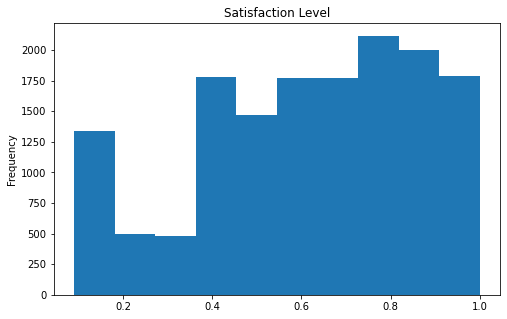

In [8]:
# Checking satisfaction levels
plt.figure(figsize=(8, 5))
hr['satisfaction_level'].plot(kind = 'hist')
plt.title('Satisfaction Level')
plt.show()

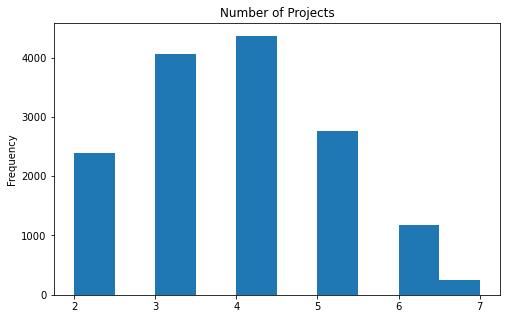

In [9]:
# Checking number of projects employees work on
plt.figure(figsize=(8, 5))
hr['number_project'].plot(kind = 'hist')
plt.title('Number of Projects')
plt.show()

In [10]:
# Checking salary groups and proportions in the company
hr['salary'].value_counts(normalize = True)

low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64

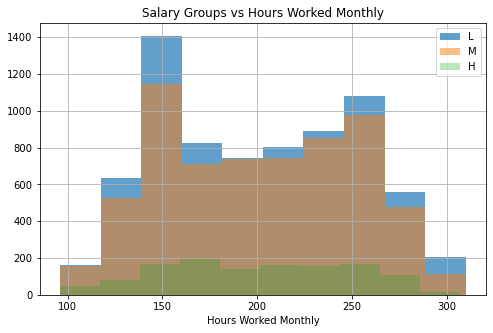

In [11]:
# Checking salary groups vs monthly hours they work
plt.figure(figsize=(8, 5))
hr[hr['salary'] == 'low']['average_montly_hours'].hist(alpha = 0.7)
hr[hr['salary'] == 'medium']['average_montly_hours'].hist(alpha = 0.5)
hr[hr['salary'] == 'high']['average_montly_hours'].hist(alpha = 0.3)
plt.legend(['L', 'M', 'H'])
plt.xlabel('Hours Worked Monthly')
plt.title('Salary Groups vs Hours Worked Monthly')
plt.show()

In [12]:
# Cheking proportions of attrition
hr['left'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [13]:
HrsVsSalary= pd.crosstab( hr['average_montly_hours'], hr['salary'])
HrsVsSalary

salary,high,low,medium
average_montly_hours,,,
96,1,3,2
97,2,7,5
98,0,15,8
99,2,5,4
100,0,8,11
...,...,...,...
306,1,13,4
307,1,12,1
308,0,7,13


<Figure size 576x360 with 0 Axes>

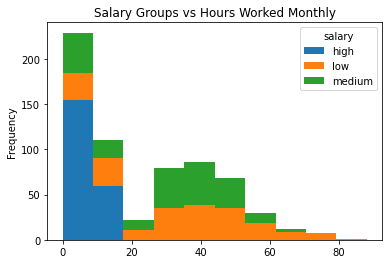

In [14]:
plt.figure(figsize=(8, 5))
HrsVsSalary.plot(kind = 'hist', stacked = True)
plt.title('Salary Groups vs Hours Worked Monthly')
plt.show()

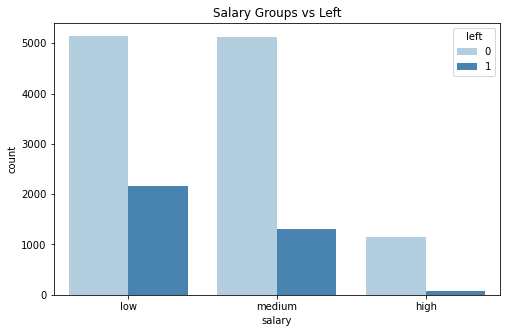

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", hue="left", data = hr, palette= 'Blues')
plt.title('Salary Groups vs Left')
plt.show()

In [16]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
# Checking for proportion of promotion in last 5 years
hr['promotion_last_5years'].value_counts(normalize = True)

0    0.978732
1    0.021268
Name: promotion_last_5years, dtype: float64

In [18]:
# What does sales column do?
hr.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [19]:
# Departments vs quitting
departmentVSquitting = pd.crosstab(hr['sales'], hr['left'])
departmentVSquitting

left,0,1
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


<Figure size 576x360 with 0 Axes>

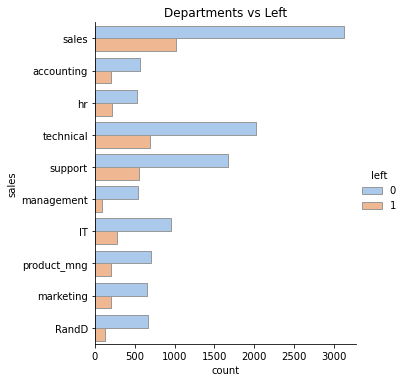

In [20]:
# Departments vs quitting plot
plt.figure(figsize=(8, 5))
sns.catplot(y="sales", hue="left", kind="count",
            palette="pastel", edgecolor=".6",
            data= hr)
plt.title('Departments vs Left')
plt.show()

In [21]:
# Proportions of departments in the company
hr['sales'].value_counts(normalize = True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64

In [22]:
hr['left'].value_counts(normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

## After mocking around with features, time to get down to serious business

## Feature selection with Random Forest - without categorical columns

                       importance
satisfaction_level       0.363948
number_project           0.195201
time_spend_company       0.184620
average_montly_hours     0.137940
last_evaluation          0.109678
Work_accident            0.008000
promotion_last_5years    0.000612


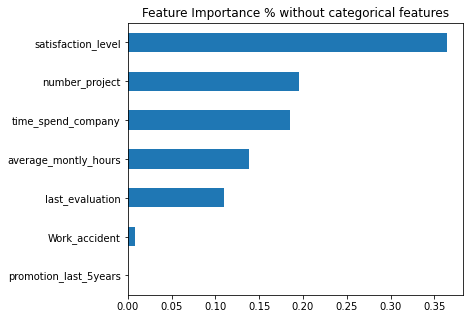

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = hr.drop(['left', 'sales', 'salary'], axis = 1)
y = hr.left

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

rfc = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)
model = rfc.fit(X_train, y_train)

feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(6, 5))
feat_importances.plot(kind='barh')
plt.title('Feature Importance % without categorical features')
plt.show()

## All EDA's based on feature importance

## Satisfaction Level Histogram

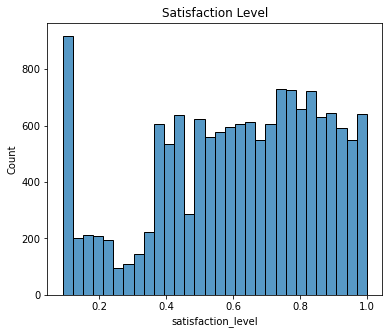

In [24]:
plt.figure(figsize = (6,5))
sns.histplot(x="satisfaction_level", data= hr)
plt.title('Satisfaction Level')
plt.show()

## Satisfaction Level vs Left

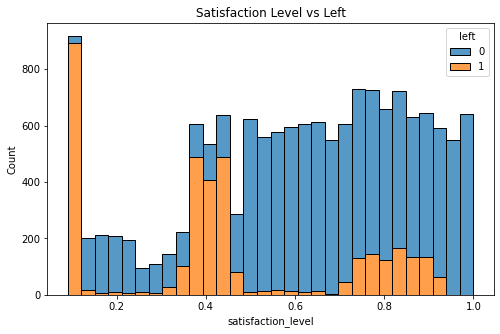

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(data=hr, x="satisfaction_level", hue = "left", multiple = 'stack')
plt.title('Satisfaction Level vs Left')
plt.show()

## Number of projects vs Left

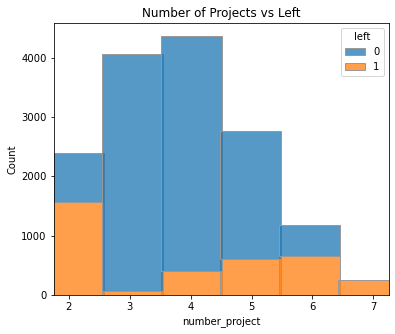

In [27]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

plt.figure(figsize = (6, 5))
ax = sns.histplot(x = 'number_project', hue = 'left', multiple = 'stack', data = hr, edgecolor = '0.6')

change_width(ax, 1)
plt.title('Number of Projects vs Left')
plt.show()

<Figure size 576x360 with 0 Axes>

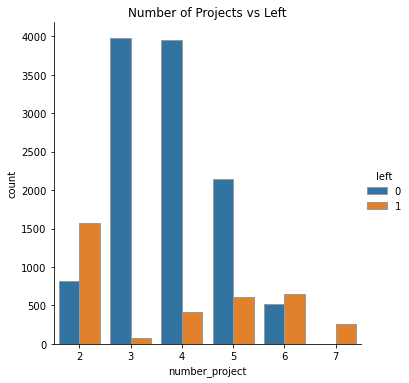

In [28]:
plt.figure(figsize=(8, 5))
sns.catplot(x = 'number_project', hue ='left', data = hr, kind="count", edgecolor=".6")
plt.title('Number of Projects vs Left')
plt.show()

## Time Spent in the company vs Left

<Figure size 576x360 with 0 Axes>

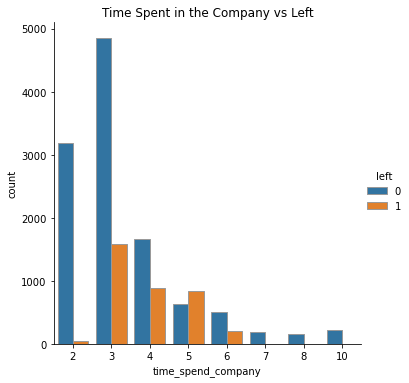

In [29]:
plt.figure(figsize=(8, 5))
sns.catplot(x = 'time_spend_company', hue ='left', data = hr, kind="count", edgecolor=".6")
plt.title('Time Spent in the Company vs Left')
plt.show()

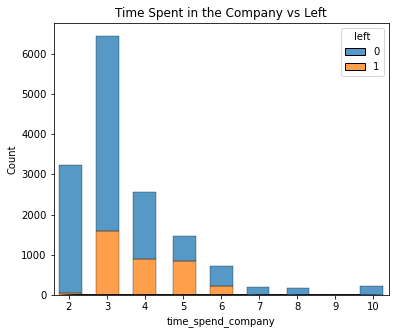

In [30]:
#fig, ax = plt.subplots()

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
plt.figure(figsize = (6, 5))
ax = sns.histplot(x = 'time_spend_company', hue = 'left', multiple = 'stack', data = hr)
change_width(ax, .60)
plt.title('Time Spent in the Company vs Left')
plt.show()

In [31]:
hr.groupby('time_spend_company')['left'].value_counts(normalize = True)

time_spend_company  left
2                   0       0.983662
                    1       0.016338
3                   0       0.753841
                    1       0.246159
4                   0       0.651936
                    1       0.348064
5                   1       0.565513
                    0       0.434487
6                   0       0.708914
                    1       0.291086
7                   0       1.000000
8                   0       1.000000
10                  0       1.000000
Name: left, dtype: float64

## Monthly hours vs Left

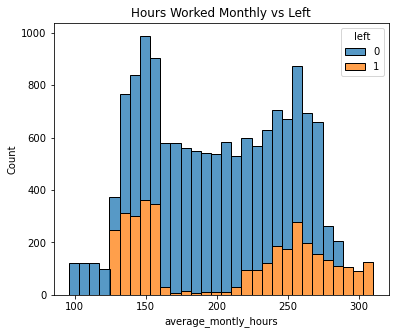

In [33]:
plt.figure(figsize=(6, 5))
sns.histplot(data=hr, x="average_montly_hours", hue = "left", multiple = 'stack')
plt.title('Hours Worked Monthly vs Left')
plt.show()

## Salary vs Left

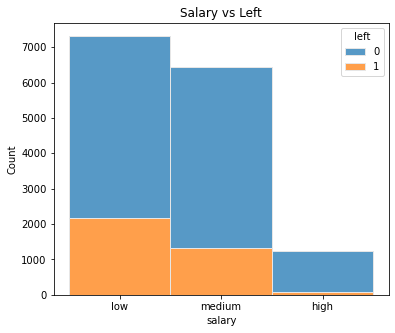

In [34]:
plt.figure(figsize=(6, 5))
sns.histplot(x = 'salary', hue ='left', data = hr, multiple = 'stack',edgecolor=".9")
plt.title('Salary vs Left')
plt.show()

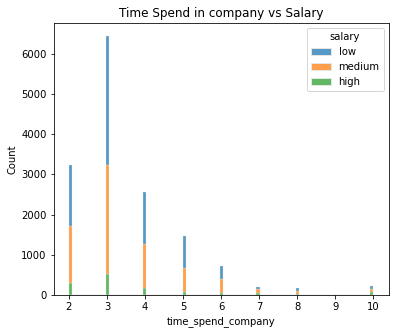

In [35]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
plt.figure(figsize=(6, 5))
sns.histplot(x = 'time_spend_company', hue ='salary', data = hr, multiple = 'stack',edgecolor=".9")
change_width(ax, .60)
plt.title('Time Spend in company vs Salary')
plt.show()

In [36]:
yearsVSsalary = hr.groupby('time_spend_company')['salary'].value_counts(normalize = True)
yearsVSsalary

time_spend_company  salary
2                   low       0.470715
                    medium    0.435882
                    high      0.093403
3                   low       0.497439
                    medium    0.421853
                    high      0.080708
4                   low       0.508408
                    medium    0.423934
                    high      0.067657
5                   low       0.542430
                    medium    0.412763
                    high      0.044807
6                   low       0.463788
                    medium    0.459610
                    high      0.076602
7                   medium    0.606383
                    high      0.202128
                    low       0.191489
8                   medium    0.518519
                    low       0.370370
                    high      0.111111
10                  medium    0.439252
                    high      0.299065
                    low       0.261682
Name: salary, dtype: float64

In [37]:
yearVSsalary = pd.crosstab(hr['time_spend_company'], hr['salary'])
yearVSsalary

salary,high,low,medium
time_spend_company,,,
2,303,1527,1414
3,520,3205,2718
4,173,1300,1084
5,66,799,608
6,55,333,330
7,38,36,114
8,18,60,84
10,64,56,94


## Departments vs Left

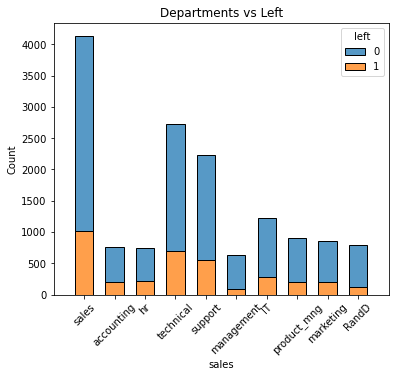

In [38]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        
plt.figure(figsize = (6, 5))
ax = sns.histplot(x = 'sales', hue = 'left', multiple = 'stack', data = hr)
change_width(ax, .60)
plt.title('Departments vs Left')
plt.xticks(rotation = 45)
plt.show()

In [39]:
hr.groupby('sales')['left'].value_counts(normalize = True)

sales        left
IT           0       0.777506
             1       0.222494
RandD        0       0.846252
             1       0.153748
accounting   0       0.734029
             1       0.265971
hr           0       0.709066
             1       0.290934
management   0       0.855556
             1       0.144444
marketing    0       0.763403
             1       0.236597
product_mng  0       0.780488
             1       0.219512
sales        0       0.755072
             1       0.244928
support      0       0.751009
             1       0.248991
technical    0       0.743750
             1       0.256250
Name: left, dtype: float64

## Monthly work hours vs Satisfaction Level

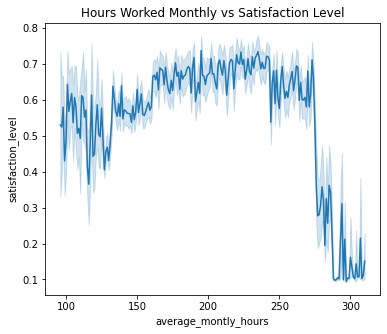

In [40]:
plt.figure(figsize=(6, 5))
sns.lineplot(x="average_montly_hours", y="satisfaction_level", data= hr)
plt.title('Hours Worked Monthly vs Satisfaction Level')
plt.show()

<Figure size 576x360 with 0 Axes>

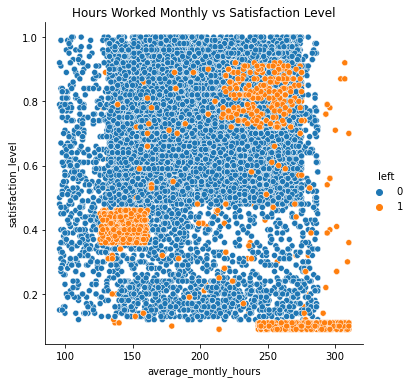

In [41]:
plt.figure(figsize=(8, 5))
sns.relplot(x = 'average_montly_hours', y = 'satisfaction_level', hue = 'left', data = hr)
plt.title('Hours Worked Monthly vs Satisfaction Level')
plt.show()

## Number of projects vs Satisfaction Level

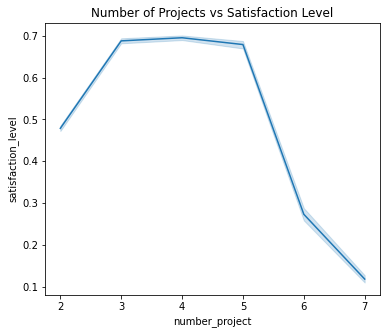

In [42]:
plt.figure(figsize=(6, 5))
sns.lineplot(x = 'number_project', y = 'satisfaction_level', data = hr)
plt.title('Number of Projects vs Satisfaction Level')
plt.show()

## Time spent in the company vs Satisfaction Level

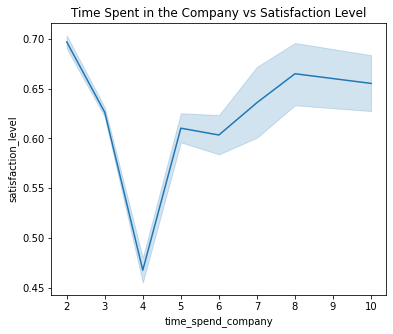

In [43]:
plt.figure(figsize=(6, 5))
sns.lineplot(x = 'time_spend_company', y = 'satisfaction_level', data = hr)
plt.title('Time Spent in the Company vs Satisfaction Level')
plt.show()

## Salary vs Satisfaction Level

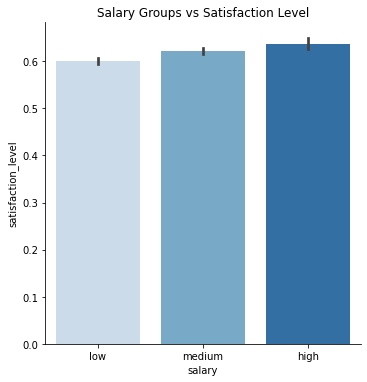

In [44]:
#plt.figure(figsize=(6, 5))
sns.catplot(x="salary", y="satisfaction_level", kind = 'bar', data= hr, palette = 'Blues')
plt.title('Salary Groups vs Satisfaction Level')
plt.show()

In [45]:
hr['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

## Departments vs Satisfaction Level

In [46]:
hr['sales'].value_counts(normalize = True)

sales          0.276018
technical      0.181345
support        0.148610
IT             0.081805
product_mng    0.060137
marketing      0.057204
RandD          0.052470
accounting     0.051137
hr             0.049270
management     0.042003
Name: sales, dtype: float64

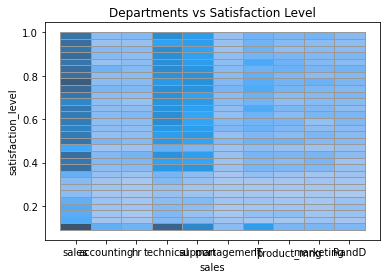

In [47]:
sns.histplot(x="sales", y = 'satisfaction_level', palette="pastel", edgecolor=".6", data= hr)
plt.title('Departments vs Satisfaction Level')
plt.show()

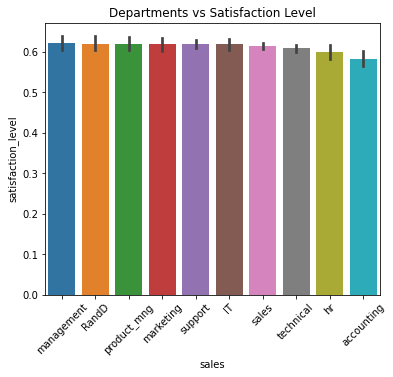

In [48]:
plt.figure(figsize=(6, 5))
order = hr.groupby(['sales'])['satisfaction_level'].mean().sort_values(ascending = False).index

sns.barplot(x="sales", y="satisfaction_level", data= hr, order = order)
plt.title('Departments vs Satisfaction Level')
plt.xticks(rotation = 45)
plt.show()

#order = iris.groupby(["species"])["sepal_width"].mean().sort_values().index

## Work Accidents

In [49]:
hr['WA'] = hr['Work_accident'].astype('category')
hr.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,WA
0,0.38,0.53,2,157,3,0,1,0,sales,low,0


In [50]:
hr.WA.dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [51]:
WAvsLeft = pd.crosstab(hr['Work_accident'], hr['left'])
WAvsLeft

left,0,1
Work_accident,,
0,9428,3402
1,2000,169


In [52]:
hr.groupby('Work_accident')['left'].value_counts(normalize = True)

Work_accident  left
0              0       0.734840
               1       0.265160
1              0       0.922084
               1       0.077916
Name: left, dtype: float64

<AxesSubplot:ylabel='Frequency'>

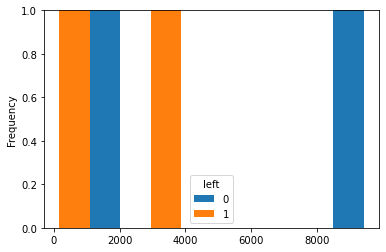

In [53]:
# Useless
WAvsLeft.plot(kind = 'hist', stacked = True)

## Correlation heatmap

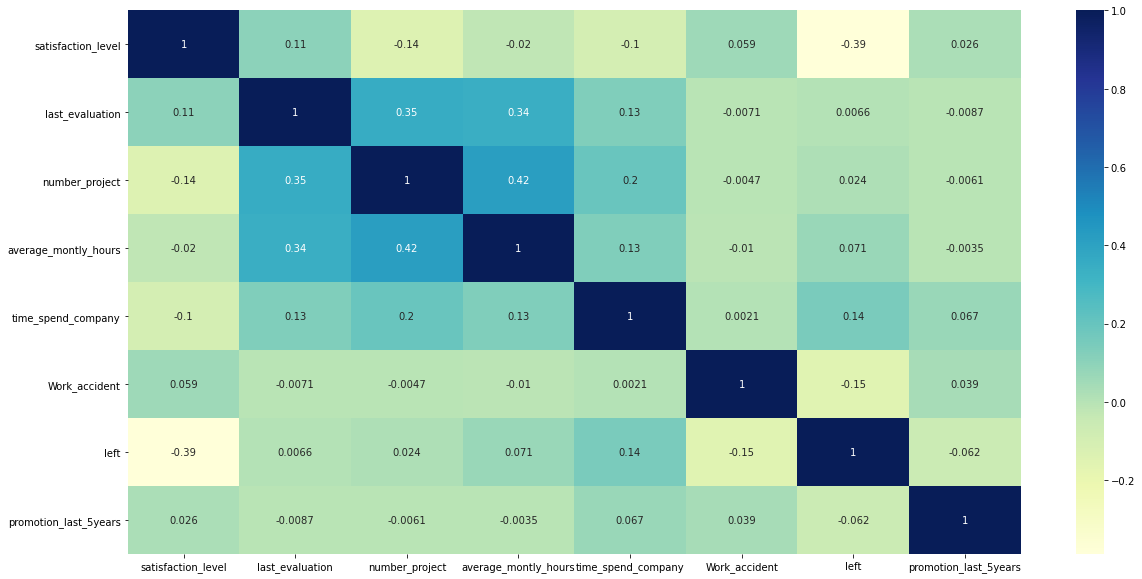

In [54]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(hr.corr(), cmap='YlGnBu', annot = True, ax=ax)
plt.show()

## Checking target value balance

In [55]:
hr.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'WA'],
      dtype='object')

In [56]:
X = hr[['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours']]
y = hr['left']

In [57]:
y.value_counts()

0    11428
1     3571
Name: left, dtype: int64

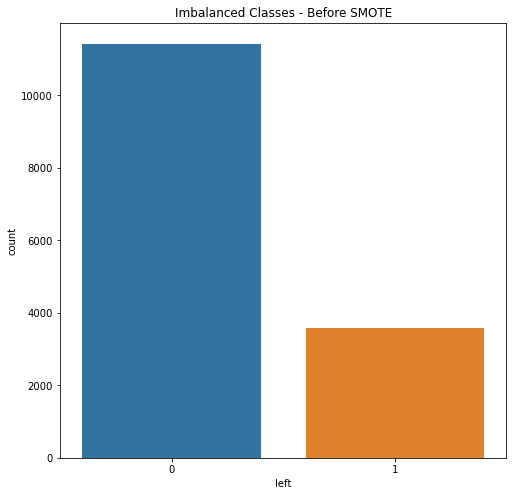

In [58]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'left', data= hr)
plt.title('Imbalanced Classes - Before SMOTE')
plt.show()

## SMOTE

In [59]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

oversampled_trainX, oversampled_trainY = sm.fit_resample(X, y)
oversampled_df = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_df.columns

Index(['left', 'satisfaction_level', 'number_project', 'time_spend_company',
       'average_montly_hours'],
      dtype='object')

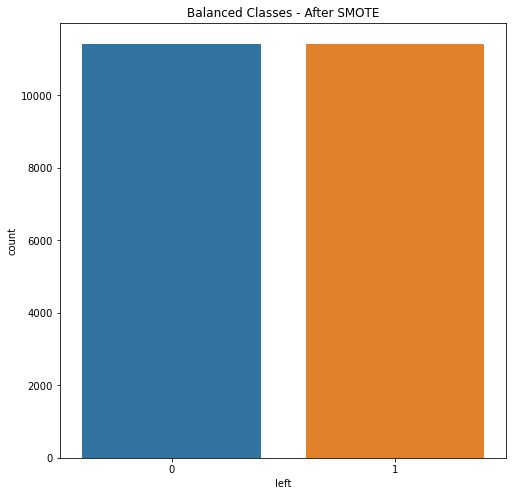

In [60]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'left', data=oversampled_df)
plt.title('Balanced Classes - After SMOTE')
plt.show()

In [61]:
oversampled_df.head()

,left,satisfaction_level,number_project,time_spend_company,average_montly_hours
0,1,0.38,2,3,157
1,1,0.80,5,6,262
2,1,0.11,7,4,272
3,1,0.72,5,5,223
4,1,0.37,2,3,159


In [62]:
oversampled_df.var()

left                       0.250011
satisfaction_level         0.070613
number_project             2.091578
time_spend_company         1.724618
average_montly_hours    2938.628214
dtype: float64

In [63]:
X_scaled = oversampled_df[['satisfaction_level', 'number_project', 'time_spend_company', 'average_montly_hours']]
y = oversampled_df['left']

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_scaled)

In [65]:
y.value_counts()

1    11428
0    11428
Name: left, dtype: int64

## Splitting data before Voting Classifier

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

## Checking accuracy scores for multiple classifiers

In [67]:
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
logreg2 = LogisticRegression(C=1, max_iter=5000, solver='liblinear', penalty = 'l1')

from sklearn.naive_bayes import GaussianNB
gnb2 = GaussianNB()

from sklearn.svm import SVC
svm2 = SVC(kernel='linear', probability=True)

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 2)

import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective = 'binary:logistic', n_estimators = 10, seed = 42, use_label_encoder = False, eval_metric = 'logloss')

from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)

from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)

In [68]:
from sklearn.ensemble import VotingClassifier

classifiers = [('LogisticRegression' , logreg2),('GaussianNB' , gnb2), ('DecisionTreeClassifier', dt2), ('XGBoost', xg_cl), ('RandomForestClassifier', rfc2), ('KNeighborsClassifier', knn2)]
#, ('SVM', svm2)
#Iterate over the defined list of tuples containing classifiers
for clf_name, clf in classifiers:
    #fit clf to the training set
    clf.fit(X_train, y_train)
    #predict the labels of the test set
    y_pred = clf.predict(X_test)
    #evaluate the accuracy of clf on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

LogisticRegression : 0.735
GaussianNB : 0.766
DecisionTreeClassifier : 0.923
XGBoost : 0.963
RandomForestClassifier : 0.958
KNeighborsClassifier : 0.968


## Logreg

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
from sklearn.model_selection import GridSearchCV
lr_params = {'penalty': ['l1','l2'], 'C': [1, 10, 100]}
grid_log = GridSearchCV(LogisticRegression(solver = 'liblinear', max_iter = 5000), lr_params, cv=5, verbose=1, n_jobs=-1)
grid_log.fit(X_scaled, y)
print('Logreg best estimator:', grid_log.best_estimator_)
print('Logreg best parameters:', grid_log.best_params_)
print('Logreg best score:', grid_log.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Logreg best estimator: LogisticRegression(C=1, max_iter=5000, solver='liblinear')
Logreg best parameters: {'C': 1, 'penalty': 'l2'}
Logreg best score: 0.7484686638519342


In [71]:
logreg2.fit(X_train, y_train)
logreg2_train_score = logreg2.score(X_train, y_train)
logreg2_test_score = logreg2.score(X_test, y_test)
print('Logreg2 train score: ', logreg2_train_score)
print('Logreg2 test score: ', logreg2_test_score)

Logreg2 train score:  0.7449226147717626
Logreg2 test score:  0.7345883600689381


In [72]:
y_pred_log2 = logreg2.predict(X_test)

In [73]:
logreg2_as = accuracy_score(y_test, y_pred_log2)
print('Logreg2 accuracy score : ', logreg2_as)

Logreg2 accuracy score :  0.7345883600689381


In [74]:
confusion_matrix_log2 = metrics.confusion_matrix(y_test, y_pred_log2)
confusion_df = pd.DataFrame(confusion_matrix_log2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])


print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               2787            1026
is_Left                   976            2754 

[['TN' 'FP']
 ['FN' 'TP']]


In [75]:
print(classification_report(y_test, y_pred_log2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      3813
           1       0.73      0.74      0.73      3730

    accuracy                           0.73      7543
   macro avg       0.73      0.73      0.73      7543
weighted avg       0.73      0.73      0.73      7543



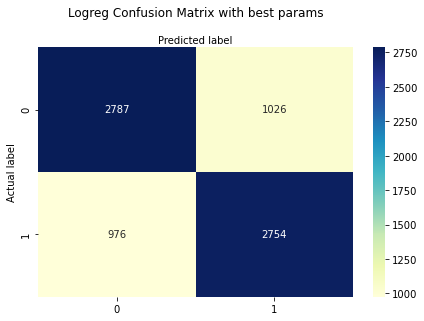

In [76]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_log2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Logreg Confusion Matrix with best params', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=6, n_jobs=-1, random_state=50)
rfc2.fit(X_train, y_train)
rfc2_train_score = rfc2.score(X_train, y_train)
rfc2_test_score = rfc2.score(X_test, y_test)
y_pred_rfc2 = rfc2.predict(X_test)
rfc_as2 = accuracy_score(y_test, y_pred_rfc2)
print('RFC2 train score: ', rfc2_train_score)
print('RFC2 test score: ', rfc2_test_score)
print('RFC2 accuracy score: ',rfc_as2)

RFC2 train score:  0.9587278782733625
RFC2 test score:  0.9577091342966989
RFC2 accuracy score:  0.9577091342966989


In [78]:
confusion_matrix_rfc2 = metrics.confusion_matrix(y_test, y_pred_rfc2)
confusion_df = pd.DataFrame(confusion_matrix_rfc2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])


print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3760              53
is_Left                   266            3464 

[['TN' 'FP']
 ['FN' 'TP']]


In [79]:
print(classification_report(y_test, y_pred_rfc2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3813
           1       0.98      0.93      0.96      3730

    accuracy                           0.96      7543
   macro avg       0.96      0.96      0.96      7543
weighted avg       0.96      0.96      0.96      7543



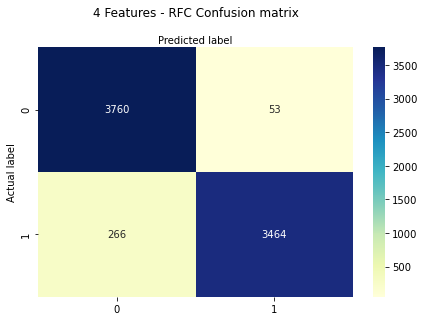

In [80]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_rfc2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('4 Features - RFC Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt2 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=10)
dt2.fit(X_train, y_train)
dt2_train_score = dt2.score(X_train, y_train)
dt2_test_score = dt2.score(X_test, y_test)
y_pred_dt2 = dt2.predict(X_test)
dt2_as2 = accuracy_score(y_test, y_pred_dt2)
print('DT2 train score: ', dt2_train_score)
print('DT2 test score: ', dt2_test_score)
print('DT2 accuracy score: ',dt2_as2)

DT2 train score:  0.9225494677724809
DT2 test score:  0.9228423704096513
DT2 accuracy score:  0.9228423704096513


In [82]:
confusion_matrix_dt2 = metrics.confusion_matrix(y_test, y_pred_dt2)
confusion_df = pd.DataFrame(confusion_matrix_dt2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])

print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3428             385
is_Left                   197            3533 

[['TN' 'FP']
 ['FN' 'TP']]


In [83]:
print(classification_report(y_test, y_pred_dt2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3813
           1       0.90      0.95      0.92      3730

    accuracy                           0.92      7543
   macro avg       0.92      0.92      0.92      7543
weighted avg       0.92      0.92      0.92      7543



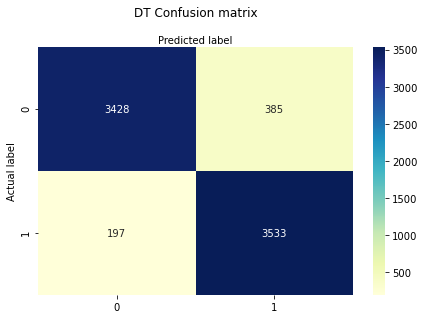

In [84]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_dt2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('DT Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier(n_neighbors = 2)
knn2.fit(X_train, y_train)
knn2_train_score = knn2.score(X_train, y_train)
knn2_test_score = knn2.score(X_test, y_test)
y_pred_knn2 = knn2.predict(X_test)
knn_as2 = accuracy_score(y_test, y_pred_knn2)
print('KNN2 train score: ', knn2_train_score)
print('KNN2 test score: ', knn2_test_score)
print('KNN2 accuracy score: ', knn_as2)

KNN2 train score:  0.985437210213544
KNN2 test score:  0.9683149940342038
KNN2 accuracy score:  0.9683149940342038


In [86]:
confusion_matrix_knn2 = metrics.confusion_matrix(y_test, y_pred_knn2)
confusion_df = pd.DataFrame(confusion_matrix_knn2, index=['is_Working', 'is_Left'], columns=['predicted_Working','predicted_Left'])

print(confusion_df, '\n')
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

            predicted_Working  predicted_Left
is_Working               3739              74
is_Left                   165            3565 

[['TN' 'FP']
 ['FN' 'TP']]


In [87]:
print(classification_report(y_test, y_pred_knn2, zero_division = 0))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3813
           1       0.98      0.96      0.97      3730

    accuracy                           0.97      7543
   macro avg       0.97      0.97      0.97      7543
weighted avg       0.97      0.97      0.97      7543



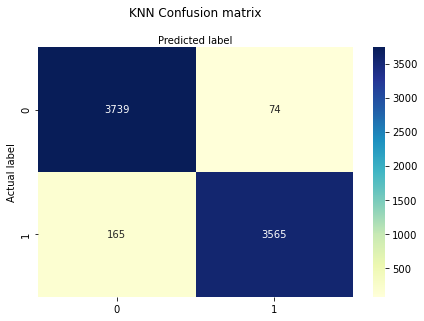

In [88]:
class_names=['Not Left','Left'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix_knn2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('KNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Precision recall curve

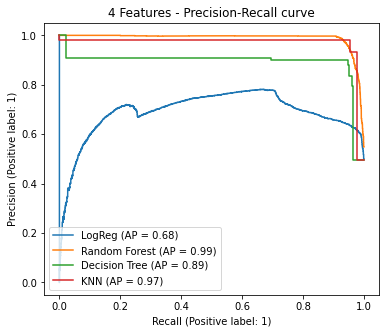

In [89]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve not used anymore
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay

plt.figure(figsize=(6, 5))
PrecisionRecallDisplay.from_estimator(logreg2, X_test, y_test, ax = plt.gca(),name = "LogReg")

PrecisionRecallDisplay.from_estimator(rfc2, X_test, y_test, ax = plt.gca(),name = "Random Forest")

PrecisionRecallDisplay.from_estimator(dt2, X_test, y_test, ax = plt.gca(),name = "Decision Tree")

PrecisionRecallDisplay.from_estimator(knn2, X_test, y_test, ax = plt.gca(),name = "KNN")

plt.title('4 Features - Precision-Recall curve')
plt.show()



#plot_precision_recall_curve
#display = PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test, name="LinearSVC"

## precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.